In [7]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from random import random, randint

In [90]:
def dist(p1, p2, dimensions = 3):
    if dimensions == 3:
        d = np.sqrt(np.power(p2[0]-p1[0],2) + np.power(p2[1]-p1[1],2) + np.power(p2[2]-p1[2],2))
    elif dimensions == 2:
        d = np.sqrt(np.power(p2[0]-p1[0],2) + np.power(p2[1]-p1[1],2))
    return d

In [91]:
def create_a_row(p1, p2, x0, dimensions=3):
    """
    A = (x-a/rB1 - x-d/rB2), (y-b/rB1 - x-3/rB2), (z-c/rB1 - x-f/rB2)
    """
    row = []
    for i in range(dimensions):
        row.append((x0[i] - p1[i])/dist(x0,p1, dimensions=dimensions) - (x0[i] - p2[i])/dist(x0,p2, dimensions=dimensions))
    
    return row
    

In [101]:
def create_fx(p1, p2, x0, dimensions=3):
    return dist(p1, x0, dimensions=dimensions) - dist(p2, x0, dimensions=dimensions)

In [133]:
num_gen_obs = 10
source_pos = [0,0,0]
rovers = []
for i in range(num_gen_obs):
    r_pos = [randint(-20, 20), randint(-20, 20), randint(-20, 20)]
    rovers.append(r_pos)

<IPython.core.display.Javascript object>


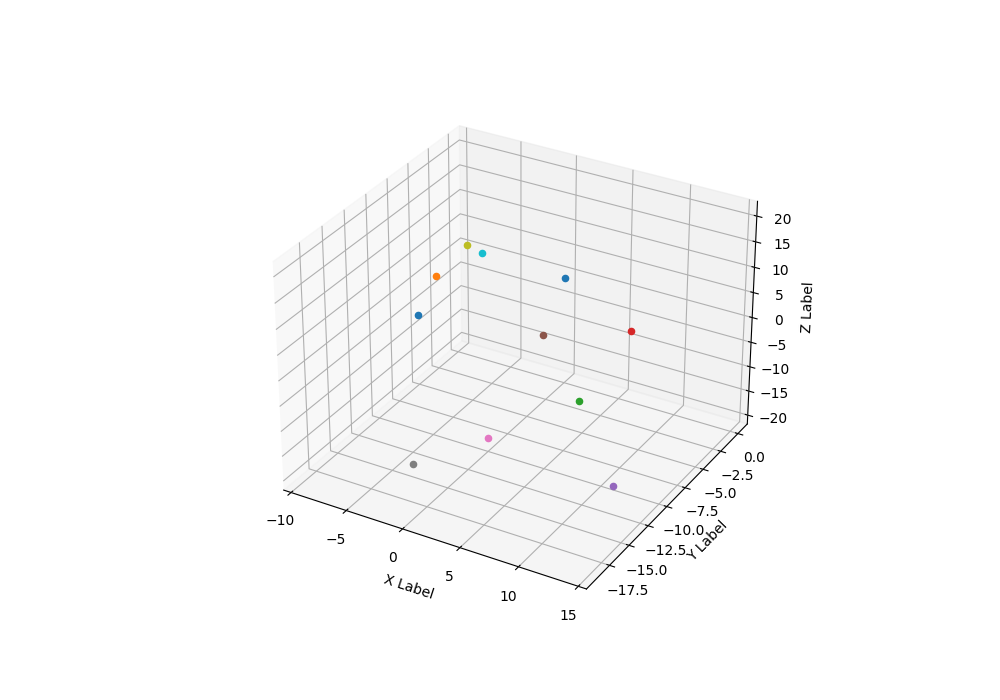

In [134]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter(source_pos[0], source_pos[1], source_pos[2])
for item in rovers:
    ax.scatter(item[0], item[1], item[2])
    

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()

# Create observations

In [147]:
tdoa_obs = []
num_obs = len(rovers)
for i, r in enumerate(rovers):
    for j in list(range(i, num_obs)):
        print(f'{i} {j}')
        if i != j:
            tdoa_obs.append((i, j, (dist(rovers[j], source_pos) - dist(rovers[i], source_pos)) + random()*4))


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 4
4 5
4 6
4 7
4 8
4 9
5 5
5 6
5 7
5 8
5 9
6 6
6 7
6 8
6 9
7 7
7 8
7 9
8 8
8 9
9 9


In [146]:
# initial pos
x0 = [1,1, 1]

In [116]:
# Create A and w
dimensions = 3

for i in range(15):

    a_mat_list = []
    w_list = []
    for obs in tdoa_obs:
        a_mat_list.append(create_a_row(rovers[obs[0]], rovers[obs[1]], x0, dimensions=dimensions))
        fx =  create_fx(rovers[obs[1]], rovers[obs[0]], x0, dimensions=dimensions)
    #     print(f'{obs[2]} - {fx})')
        w_list.append(fx - obs[2] )

    A = np.array(a_mat_list)
    w = np.array(w_list)
    N = np.matmul(np.transpose(A), A)
    U = np.matmul(np.transpose(A), w)
    delta = np.matmul(np.linalg.inv(N),U)
#     print(f'{x0}, {delta}')
    x0 = x0 + delta

print(f'Resulting pos: {x0},\t{dist(x0,source_pos, dimensions=dimensions)} m away from truth')

Resulting pos: [-0.00943217  0.03205517  0.00581998],	0.03391713488486123 m away from truth


<IPython.core.display.Javascript object>


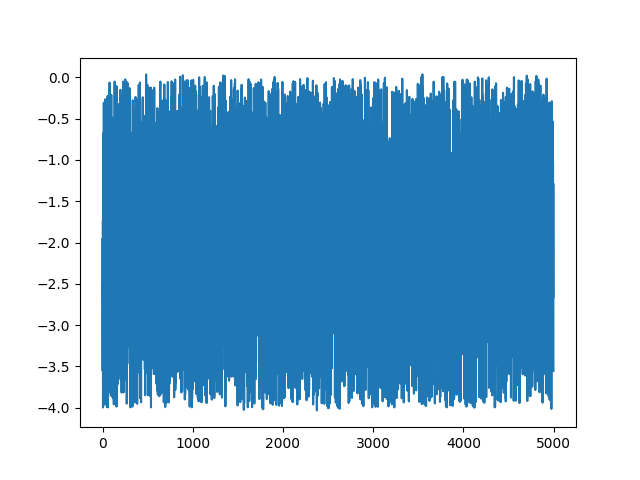

In [117]:
plt.figure()
plt.plot(w)
plt.show()

# Sandbox

In [128]:
a = [[1,2,3], [4,5,6], [7,8,9]]

In [130]:
b = [item for sublist in a for item in sublist]

In [131]:
b

[1, 2, 3, 4, 5, 6, 7, 8, 9]